<a href="https://colab.research.google.com/github/pedrohbp00/DengAI/blob/main/dengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Projeto Prático de Ciência da Computação**


 > Objetivo: desenvolver um modelo de machine learning capaz de prever os casos de dengue nas cidades de San Juan e Iquitos, localizadas em Porto Rico e Peru, respectivamente.


### **Dataset/Fonte dos Dados**

> Dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

> Fonte dos dados: os dados foram coletados por agências governamentais dos EUA e estão disponíveis no seguinte link: http://www.cdc.gov/ 

In [1]:
# Importando as bibliotecas para análise e processamento dos dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Setando o estilo dos gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 6]

### **1. Carregando o Dataset**

In [3]:
# Carregando o Dataframe com os dados do Dataset
df_features_train = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_features_train.csv')
df_features_test = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_features_test.csv')
df_labels_train = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_labels_train.csv')

print('Shape - Features de Treino:', df_features_train.shape)
print('Shape - Features de Teste:', df_features_train.shape)
print('Shape - Labels de Treino:', df_labels_train.shape)

df_features_train.head()

Shape - Features de Treino: (1456, 24)
Shape - Features de Teste: (1456, 24)
Shape - Labels de Treino: (1456, 4)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
df_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### **2. Ano com mais casos de Dengue: 1994**

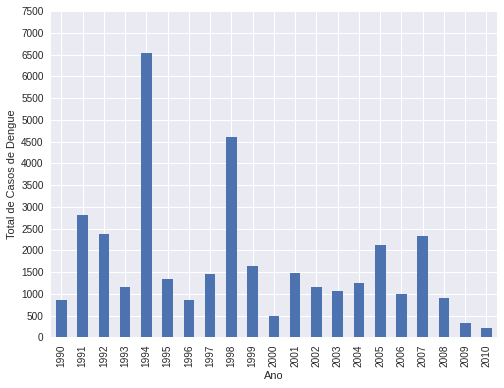

In [5]:
ano_max_casos = df_labels_train.groupby(['year'])['total_cases'].sum()

# Plotagem do gráfico
ano_max_casos.plot(kind='bar')
plt.yticks(np.arange(0,8000, step=500))
plt.ylabel('Total de Casos de Dengue')
plt.xlabel('Ano')
plt.show()

### **3. Cidade com mais casos de Dengue: San Juan (sj)**

[]

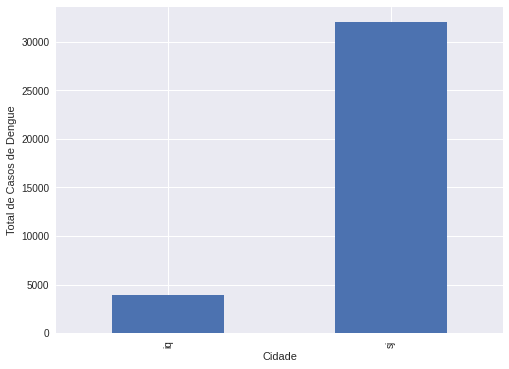

In [6]:
cidade_top_casos = df_labels_train.groupby(['city'])['total_cases'].sum()

# Plotagem do gráfico
cidade_top_casos.plot(kind='bar')
plt.xlabel('Cidade')
plt.ylabel('Total de Casos de Dengue')
plt.plot()

### **4. Processamento e Tratamento dos Dados**

In [7]:
# Verificando se há valores nulos
df_features_train.info()
df_features_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [8]:
# Capturando as variáveis(features) que têm valores nulos
missing = list(df_features_train.columns[df_features_train.isna().sum() > 0])

# Preenchendo os valores nulos com a média
for feature in missing:
  df_features_train[feature] = df_features_train[feature].fillna(df_features_train[feature].mean())
  
df_features_train.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

**4.1 Adicionando o total de casos ('total_cases') para o dataframe de features**

In [9]:
df_features_train['total_cases'] = df_labels_train['total_cases']

**4.2 Convertendo as temperaturas de Kelvin para Celsius**

In [23]:
temp_kelvin = [i for i in df_features_train.columns if i.find('_temp_k') > - 1]

for i in temp_kelvin:
  df_features_train[i] = df_features_train[i] - 273.15

df_features_train.columns = [i.replace('_temp_k', '_temp_c') for i in df_features_train.columns if i.find('_temp_k')]

**4.2 Encontrando a média entre as temperaturas**

In [24]:
# station_min_temp_c e station_max_temp_c = media_station_temp_c

# Combinando as features através da média
df_features_train['media_station_temp_c'] = (df_features_train['station_max_temp_c'] + df_features_train['station_min_temp_c']) / 2
df_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,media_station_temp_c,media_reanalysis_air_temp_c
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,14.01,2.63,-247.71,6.90,-243.75,-253.15,16.0,4,-248.45,297.85
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,15.37,2.37,-246.44,6.37,-241.45,-250.95,8.6,5,-246.20,298.65
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,...,16.85,2.30,-246.44,6.49,-240.95,-250.35,41.4,4,-245.65,298.90
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,...,16.67,2.43,-245.68,6.77,-239.85,-249.85,4.0,3,-244.85,299.20
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,...,17.21,3.01,-244.21,9.37,-238.15,-249.25,5.8,6,-243.70,299.70


In [12]:
# reanalysis_min_air_temp_c e reanalysis_min_air_temp_c = media_reanalysis_air_temp_c
df_features_train['media_reanalysis_air_temp_c'] = (df_features_train['reanalysis_max_air_temp_c'] + df_features_train['reanalysis_min_air_temp_c']) / 2
df_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,media_station_temp_c,media_reanalysis_air_temp_c
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,-247.707143,6.900000,-243.75,-253.15,16.0,4,-248.45,297.85
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,-246.435714,6.371429,-241.45,-250.95,8.6,5,-246.20,298.65
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,-246.435714,6.485714,-240.95,-250.35,41.4,4,-245.65,298.90
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,-245.678571,6.771429,-239.85,-249.85,4.0,3,-244.85,299.20
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,-244.207143,9.371429,-238.15,-249.25,5.8,6,-243.70,299.70


In [13]:
df_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,media_station_temp_c,media_reanalysis_air_temp_c
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,16.746427,4.903754,-245.964217,8.059328,-240.697563,-251.047850,39.326360,24.675137,-245.872706,299.573133
std,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,1.522551,...,1.537184,3.534237,1.273108,2.096879,1.945806,1.566475,47.095179,43.596000,1.331497,1.325096
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,11.715714,1.357143,-251.750000,4.528571,-246.450000,-258.450000,0.000000,0.000000,-250.350000,295.800000
25%,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,...,15.561429,2.328571,-246.821429,6.528571,-242.050000,-252.050000,8.850000,5.000000,-246.750000,298.550000
50%,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,295.625714,...,17.065000,2.864286,-245.764286,7.385714,-240.350000,-250.950000,24.450000,12.000000,-245.650000,299.650000
75%,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,...,17.974643,7.553571,-245.021429,9.500000,-239.250000,-249.850000,53.600000,28.000000,-244.850000,300.550000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,20.461429,16.028571,-242.350000,15.800000,-230.950000,-247.550000,543.300000,461.000000,-241.150000,304.400000


**4.3 Arredondando os valores para 2 casas decimais**

In [14]:
df_features_train = df_features_train.round(2)
df_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,media_station_temp_c,media_reanalysis_air_temp_c
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,14.01,2.63,-247.71,6.90,-243.75,-253.15,16.0,4,-248.45,297.85
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,15.37,2.37,-246.44,6.37,-241.45,-250.95,8.6,5,-246.20,298.65
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,...,16.85,2.30,-246.44,6.49,-240.95,-250.35,41.4,4,-245.65,298.90
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,...,16.67,2.43,-245.68,6.77,-239.85,-249.85,4.0,3,-244.85,299.20
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,...,17.21,3.01,-244.21,9.37,-238.15,-249.25,5.8,6,-243.70,299.70


**4.4 Relação entre o índice NDVI com o total de casos de Dengue**

Text(0.5, 1.0, 'Total de Casos vs ndvi_sw')

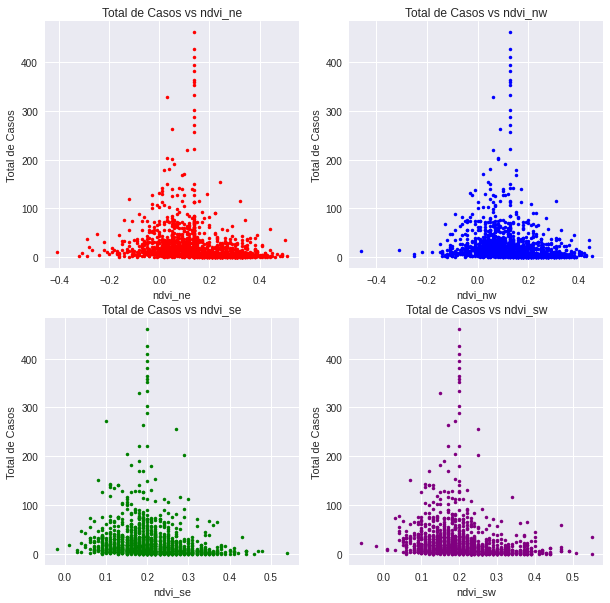

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]

# ndvi_ne
plt.subplot(2, 2, 1)
plt.plot(df_features_train['ndvi_ne'], df_features_train['total_cases'], 
         marker='.', linestyle='none', color='red')
plt.xlabel('ndvi_ne')
plt.ylabel('Total de Casos')
plt.title('Total de Casos vs ' + 'ndvi_ne')

# ndvi_nw
plt.subplot(2, 2, 2)
plt.plot(df_features_train['ndvi_nw'], df_features_train['total_cases'], 
         marker='.', linestyle='none', color='blue')
plt.xlabel('ndvi_nw')
plt.ylabel('Total de Casos')
plt.title('Total de Casos vs ' + 'ndvi_nw')

# ndvi_se
plt.subplot(2, 2, 3)
plt.plot(df_features_train['ndvi_se'], df_features_train['total_cases'], 
         marker='.', linestyle='none', color='green')
plt.xlabel('ndvi_se')
plt.ylabel('Total de Casos')
plt.title('Total de Casos vs ' + 'ndvi_se')

# ndvi_sw
plt.subplot(2, 2, 4)
plt.plot(df_features_train['ndvi_sw'], df_features_train['total_cases'], 
         marker='.', linestyle='none', color='purple')
plt.xlabel('ndvi_sw')
plt.ylabel('Total de Casos')
plt.title('Total de Casos vs ' + 'ndvi_sw')

ignorar

**4.5 Separando as cidades em dois datasets diferentes**

In [16]:
X_sj = df_features_train[df_features_train['city'] == 'sj']
X_iq = df_features_train[df_features_train['city'] == 'iq']

X_sj =  X_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
X_iq =  X_iq.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

X_iq

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,media_station_temp_c,media_reanalysis_air_temp_c
936,2000,0.19,0.13,0.34,0.25,25.41,296.74,298.45,295.18,307.3,...,16.65,8.93,-246.75,10.78,-240.65,-252.45,3.0,0,-246.55,300.20
937,2000,0.22,0.28,0.29,0.24,60.61,296.63,298.43,295.36,306.6,...,16.86,10.31,-246.25,11.57,-239.15,-252.35,55.6,0,-245.75,298.85
938,2000,0.18,0.17,0.20,0.13,55.52,296.42,297.39,295.62,304.5,...,17.12,7.39,-246.35,11.47,-240.15,-252.45,38.1,0,-246.30,298.55
939,2000,0.23,0.15,0.25,0.20,5.60,295.36,296.23,292.80,303.6,...,14.43,9.11,-247.38,10.53,-241.65,-258.45,30.0,0,-250.05,296.10
940,2000,0.33,0.32,0.25,0.36,62.76,296.43,297.64,293.96,307.0,...,15.44,9.50,-246.55,11.48,-239.85,-254.05,4.0,0,-246.95,299.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,0.34,0.32,0.26,0.29,55.30,299.33,300.77,296.83,309.7,...,18.49,9.80,-244.52,11.93,-237.75,-250.75,27.0,5,-244.25,302.10
1452,2010,0.16,0.16,0.14,0.23,86.47,298.33,299.39,296.45,308.5,...,18.07,7.47,-245.72,10.50,-238.45,-251.45,36.6,8,-244.95,300.20
1453,2010,0.25,0.15,0.25,0.23,58.94,296.60,297.59,295.50,305.5,...,17.01,7.50,-248.75,6.90,-240.95,-253.95,7.4,1,-247.45,298.95
1454,2010,0.33,0.25,0.28,0.33,59.67,296.35,297.52,295.32,306.1,...,16.82,7.87,-247.72,8.73,-241.95,-252.15,16.0,1,-247.05,299.00


In [17]:
# Criando um dataset de teste
X_sj_random = X_sj.iloc[:].values
X_iq_random = X_iq.iloc[:].values

# Colocando valores aleatórios
np.random.shuffle(X_sj_random)
np.random.shuffle(X_iq_random)

### **5. Prevendo o Número de Casos de Dengue**

**5.1 Separando o Dataset em Treino e Teste**

In [18]:
from sklearn.model_selection import train_test_split

X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X_sj_random[:, :-1], X_sj_random[:, -1], test_size=0.35)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X_iq_random[:, :-1], X_iq_random[:, -1], test_size=0.35)

**5.2 Padronização dos Dados**

In [19]:
from sklearn.preprocessing import StandardScaler

# Padronizando o dataset de San Juan
sj_padrao = StandardScaler()
X_sj_train = sj_padrao.fit_transform(X_sj_train)
X_sj_test = sj_padrao.transform(X_sj_test)

# Padronizando o dataset de Iquitos
iq_padrao = StandardScaler()
X_iq_train = iq_padrao.fit_transform(X_iq_train)
X_iq_test = iq_padrao.transform(X_iq_test)


**5.3 Criando o Modelo Preditivo**

In [20]:
# Imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

5.3.1 Algoritmo KNN - K Neighbors Regressor

In [21]:
# San Juan
sj_knn = KNeighborsRegressor()
sj_knn.fit(X_sj_train, y_sj_train)

y_sj_predict = sj_knn.predict(X_sj_test)

print('sj:',mean_absolute_error(y_sj_test, y_sj_predict))

# Iquitos
iq_knn = KNeighborsRegressor()
iq_knn.fit(X_iq_train, y_iq_train)

y_iq_predict = iq_knn.predict(X_iq_test)

print('iq:',mean_absolute_error(y_iq_test, y_iq_predict))

sj: 0.24485365853658264
iq: 0.5361648351648329


5.3.2 Algoritmo Random Forest Regressor (ADA)

In [22]:
# San Juan
sj_ada = RandomForestRegressor()
sj_ada.fit(X_sj_train, y_sj_train)
y_sj_predict = sj_ada.predict(X_sj_test)

print('sj:',mean_absolute_error(y_sj_test, y_sj_predict))

# Iquitos
iq_ada = RandomForestRegressor()
iq_ada.fit(X_iq_train, y_iq_train)
y_iq_predict = iq_ada.predict(X_iq_test)

print('iq:',mean_absolute_error(y_iq_test, y_iq_predict))

sj: 0.09562957317074566
iq: 0.2855873626373717
